<a href="https://colab.research.google.com/github/mariajpf03/Math-Modelling-/blob/main/NLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise Influence**

This exercise uses the data set influence2.txt
Tasks
1. Import the data set as a pandas dataframe.
2. Using Statsmodels.api ols function fit the x and y values of the data set. Follow the procedure in MM_stats_L2.ipynb.
3. Plot y versus x including the fit.
	Identify any outlying data points.
4. Add the fit of your model (“y fit”) to your data frame
5. Calculate the residuals on y (“y residuals”) and add them to the data frame.
6. Plot the residuals versus y fits.
7. Plot a histogram of the residuals
	Identify any outlying data points.
8. Test the normality of the residuals using a QQ plot. Use the following general procedure:  
import scipy.stats as stats
stats.probplot(df['y residuals'], dist="norm", plot=plt)

	Does the QQ plot indicate that the residuals are normally distributed?

9. Test the normality of the residuals using the Shapiro Wilks test or the the Kolmogorov-Smirnov test. Use the following general procedure:
	from scipy.stats import shapiro
from scipy.stats import kstest

print(shapiro(df["y residuals"]))

print(kstest(df["y residuals"], 'norm'))

	Do the tests indicate that the residuals are normally distributed?
10.
Statsmodels.api has a neat feature called get_influence() which enables you to quickly call information about outliers and points of influence. Please read the link briefly to see what it can do:
https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.html

Get the influence data from statsmodels.api ols output:
influence = model.get_influence() #where model is the name of the ols output you have chosen
11. Plot the leverage against the x values.
	Get the leverage using
	leverage = influence.hat_matrix_diag
	Explain why this plot has this particular shape
12. Plot the studentized residuals against the x values.
	Get the studentized residuals using
	student_resid = influence.resid_studentized_external
Compare the studentized residuals against a t distribution with n-k-2 degrees of freedom. Describe you findings in approximately 2-3 sentences.
	Hint: to make a t-distribution you can use the following:
	from scipy.stats import t
	rv = t(df=freedom, loc=0, scale=1) #use freedom = n-k-2
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100) # xdata for plot
y = rv.pdf(t_x) # ydata for plot

13. Plot the DFFITS against the x values
	Get DFFITS using
	(dffits, p) = influence.dffits
	Compare the DFFITS to:√(2&(k+2)/(n-k-2))
What can you conclude from this result?

14. Plot the DFBETAS against the x values
	Get DFFITS using
dfbetas = influence.dfbetas #The first column is for b0, the second for b1
Compare the DFBETAS to 2/√n .
What can you conclude from this result?


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1
import pandas as pd

file_path = '/content/drive/My Drive/Mathematical modelling/influence2.txt'

mydataframe = pd.read_csv(file_path, delimiter='\t')
print(mydataframe)

          x        y
0   0.10000  -0.0716
1   0.45401   4.1673
2   1.09765   6.5703
3   1.27936  13.8150
4   2.20611  11.4501
5   2.50064  12.9554
6   3.04030  20.1575
7   3.23583  17.5633
8   4.45308  26.0317
9   4.16990  22.7573
10  5.28474  26.3030
11  5.59238  30.6885
12  5.92091  33.9402
13  6.66066  30.9228
14  6.79953  34.1100
15  7.97943  44.4536
16  8.41536  46.5022
17  8.71607  50.0568
18  8.70156  46.5475
19  9.16463  45.7762
20  4.00000  40.0000


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     192.2
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.18e-11
Time:                        11:27:00   Log-Likelihood:                -61.294
No. Observations:                  21   AIC:                             126.6
Df Residuals:                      19   BIC:                             128.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9576      2.009      1.472      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/regressionplots.py:157: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  ax.plot(x1, results.fittedvalues[x1_argsort], 'D', color='r',


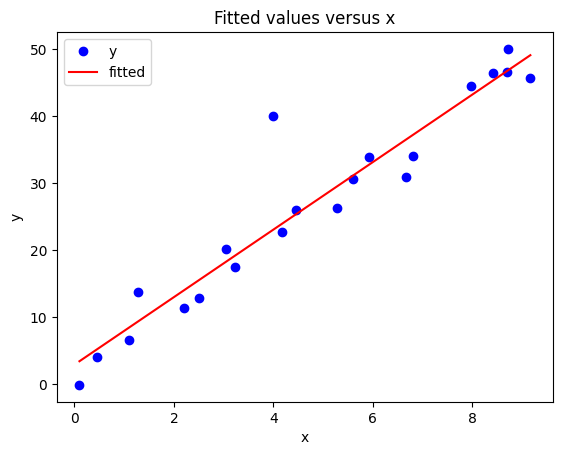

In [ ]:
#2
import statsmodels.api as sm
x = mydataframe["x"]
y = mydataframe["y"]        #yi
x = sm.add_constant(x)

my_model = sm.OLS(y,x).fit()
print(my_model.summary())

fig,ax = plt.subplots()
fig = sm.graphics.plot_fit(my_model,1,ax=ax, vlines = False, ls = "-", marker = "None")

In [ ]:
#3 ŷi
my_model.fittedvalues

0      3.461372
1      5.244643
2      8.486879
3      9.402215
4     14.070574
5     15.554223
6     18.272677
7     19.257629
8     25.389337
9     23.962861
10    29.578695
11    31.128383
12    32.783302
13    36.509678
14    37.209214
15    43.152777
16    45.348706
17    46.863486
18    46.790394
19    49.123037
20    23.107016
dtype: float64

In [ ]:
#4 Add the fit of your model (“y fit”) to your data frame
mydataframe["y fit"] = my_model.fittedvalues

In [ ]:
mydataframe

,x,y,y fit
0,0.10000,-0.0716,3.461372
1,0.45401,4.1673,5.244643
2,1.09765,6.5703,8.486879
3,1.27936,13.8150,9.402215
4,2.20611,11.4501,14.070574
5,2.50064,12.9554,15.554223
6,3.04030,20.1575,18.272677
7,3.23583,17.5633,19.257629
8,4.45308,26.0317,25.389337
9,4.16990,22.7573,23.962861


In [ ]:
#5 Calculate the residuals on y (“y residuals”) and add them to the data frame.
my_model.resid

0     -3.532972
1     -1.077343
2     -1.916579
3      4.412785
4     -2.620474
5     -2.598823
6      1.884823
7     -1.694329
8      0.642363
9     -1.205561
10    -3.275695
11    -0.439883
12     1.156898
13    -5.586878
14    -3.099214
15     1.300823
16     1.153494
17     3.193314
18    -0.242894
19    -3.346837
20    16.892984
dtype: float64

In [ ]:
mydataframe["y residuals"] = my_model.resid

In [ ]:
mydataframe

,x,y,y fit,y residuals
0,0.10000,-0.0716,3.461372,-3.532972
1,0.45401,4.1673,5.244643,-1.077343
2,1.09765,6.5703,8.486879,-1.916579
3,1.27936,13.8150,9.402215,4.412785
4,2.20611,11.4501,14.070574,-2.620474
5,2.50064,12.9554,15.554223,-2.598823
6,3.04030,20.1575,18.272677,1.884823
7,3.23583,17.5633,19.257629,-1.694329
8,4.45308,26.0317,25.389337,0.642363
9,4.16990,22.7573,23.962861,-1.205561


Text(0, 0.5, 'residuals')

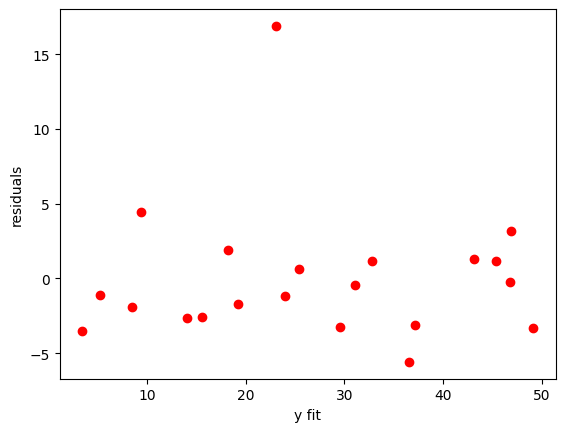

In [ ]:
#6 Plot the residuals versus y fits.  y fit = x-axis,  residuals = y axis

import matplotlib.pyplot as plt
plt.plot(mydataframe.iloc[:,2], mydataframe.iloc[:,3],marker='o', linestyle="", color = 'red')
plt.xlabel('y fit')
plt.ylabel('residuals')

                            OLS Regression Results                            
Dep. Variable:            y residuals   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               1.00
Time:                        11:27:00   Log-Likelihood:                -61.294
No. Observations:                  21   AIC:                             126.6
Df Residuals:                      19   BIC:                             128.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.306e-15      2.195  -2.87e-15      1.0

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/regressionplots.py:157: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  ax.plot(x1, results.fittedvalues[x1_argsort], 'D', color='r',


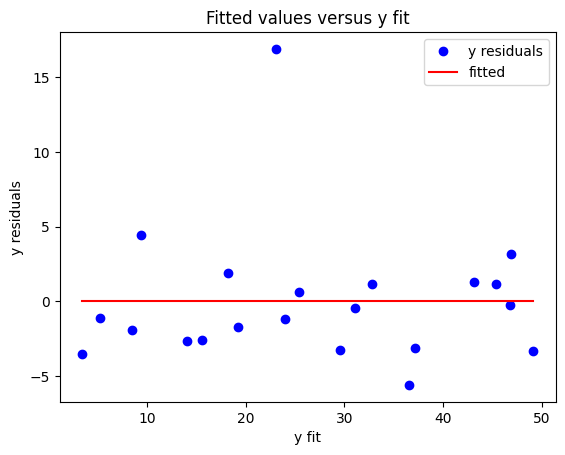

In [ ]:
import statsmodels.api as sm
x = mydataframe.iloc[:,2]
y = mydataframe.iloc[:,3]
x = sm.add_constant(x)

my_model = sm.OLS(y,x).fit()
print(my_model.summary())

fig,ax = plt.subplots()
fig = sm.graphics.plot_fit(my_model,1,ax=ax, vlines = False, ls = "-", marker = "None")   #what does true/false mean here

In [ ]:
#we see that where the y fit is about 24, the y residuals is way over 15, we can therefore conclude this to be an outlier

(array([3., 7., 6., 3., 1., 0., 0., 0., 0., 1.]),
 array([-5.58687773, -3.3388916 , -1.09090548,  1.15708065,  3.40506678,
         5.65305291,  7.90103904, 10.14902517, 12.3970113 , 14.64499743,
        16.89298356]),
 <BarContainer object of 10 artists>)

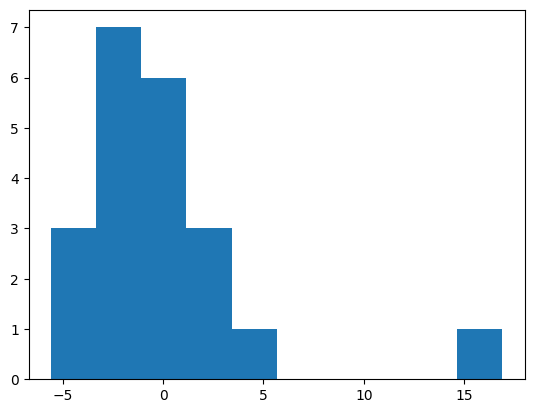

In [ ]:
#plt.hist(mydataframe["Calories"])
#7 Plot a histogram of the residuals Identify any outlying data points.

plt.hist(mydataframe["y residuals"])

In [ ]:
# more confirmation of the outlier

In [ ]:
#Test the normality of the residuals using a QQ plot. Use the following general procedure:
#Does the QQ plot indicate that the residuals are normally distributed?

#import scipy.stats as stats stats.probplot(df['y residuals'], dist="norm", plot=plt)



((array([-1.84569542, -1.41352783, -1.14765351, -0.94487504, -0.77501005,
         -0.62504005, -0.48799157, -0.35957249, -0.23684388, -0.11759451,
          0.        ,  0.11759451,  0.23684388,  0.35957249,  0.48799157,
          0.62504005,  0.77501005,  0.94487504,  1.14765351,  1.41352783,
          1.84569542]),
  array([-5.58687773, -3.5329725 , -3.3468375 , -3.27569455, -3.09921378,
         -2.62047434, -2.59882344, -1.91657934, -1.69432882, -1.20556129,
         -1.07734286, -0.43988324, -0.24289433,  0.64236346,  1.15349369,
          1.15689794,  1.30082333,  1.88482317,  3.1933138 ,  4.41278477,
         16.89298356])),
 (4.094809725034618, -1.2353919357342382e-14, 0.8480927260880982))

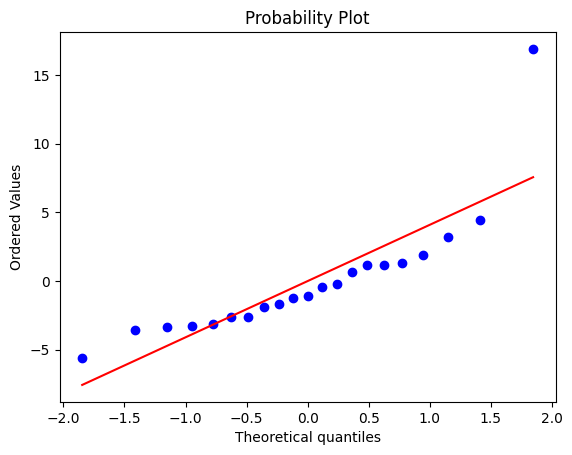

In [ ]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

stats.probplot(mydataframe['y residuals'], dist="norm", plot=plt)

Does the QQ plot indicate that the residuals are normally distributed?


Yes it does, all except the one outlier follow the residual line

In [ ]:
#9 Test the normality of the residuals using the Shapiro Wilks test or the the Kolmogorov-Smirnov test. Use the following general procedure:
#from scipy.stats import shapiro from scipy.stats import kstest
#print(shapiro(df["y residuals"]))
#print(kstest(df["y residuals"], 'norm'))

In [ ]:
from scipy.stats import shapiro
from scipy.stats import kstest

print(shapiro(mydataframe["y residuals"]))
print(kstest(mydataframe["y residuals"], 'norm'))

ShapiroResult(statistic=0.7492746114730835, pvalue=0.00012113500997656956)
KstestResult(statistic=0.3834700200442271, pvalue=0.0027467533026463986, statistic_location=-1.6943288198828448, statistic_sign=1)


10. Statsmodels.api has a neat feature called get_influence() which enables you to quickly call information about outliers and points of influence.

Please read the link briefly to see what it can do: https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.html

Get the influence data from statsmodels.api ols output: influence = model.get_influence() #where model is the name of the ols output you have chosen

In [ ]:
influence = my_model.get_influence()
influence

In [ ]:
influence

In [ ]:
#11. Plot the leverage against the x values. Get the leverage using leverage = influence.hat_matrix_diag Explain why this plot has this particular shape

leverage = influence.hat_matrix_diag
leverage

array([0.17629677, 0.15745391, 0.12701457, 0.11931316, 0.08614534,
       0.07774395, 0.06502813, 0.06127602, 0.0481472 , 0.04962807,
       0.04931327, 0.0518295 , 0.0557598 , 0.06931045, 0.07258004,
       0.10961573, 0.12748906, 0.14113596, 0.14045276, 0.16349185,
       0.05097444])

Text(0, 0.5, 'leverage')

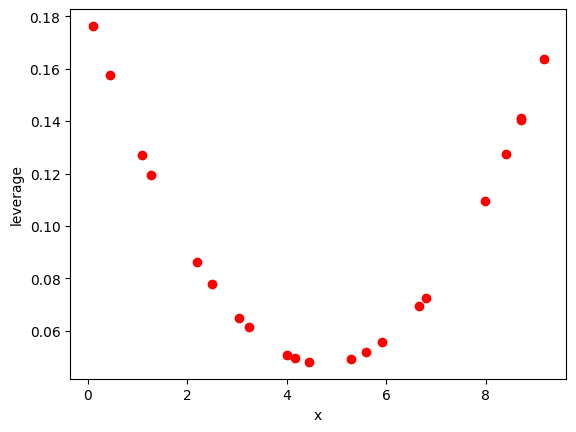

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mydataframe.iloc[:,0], leverage,marker='o', linestyle="", color = 'red')
plt.xlabel('x')
plt.ylabel('leverage')

12. Plot the studentized residuals against the x values.

Get the studentized residuals using student_resid = influence.
resid_studentized_external

* Compare the studentized residuals against a t distribution with n-k-2 degrees of freedom.
* Describe you findings in approximately 2-3 sentences.

Hint: to make a t-distribution you can use the following:

from scipy.stats import t rv = t(df=freedom, loc=0, scale=1) #use freedom = n-k-2 x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100) # xdata for plot y = rv.pdf(t_x) # ydata for plot



In [ ]:
student_resid = influence. resid_studentized_external   #divide by std... check powerpoint again
student_resid

array([-0.81916651, -0.24290537, -0.42596177,  0.99808661, -0.57149911,
       -0.56405976,  0.40458192, -0.36264263,  0.13610958, -0.25597698,
       -0.70363292, -0.09336169,  0.24640779, -1.24719479, -0.67326065,
        0.2854828 ,  0.25561479,  0.72218968, -0.05413613, -0.76838197,
        6.69012861])

Text(0, 0.5, 'Studentized Residuals')

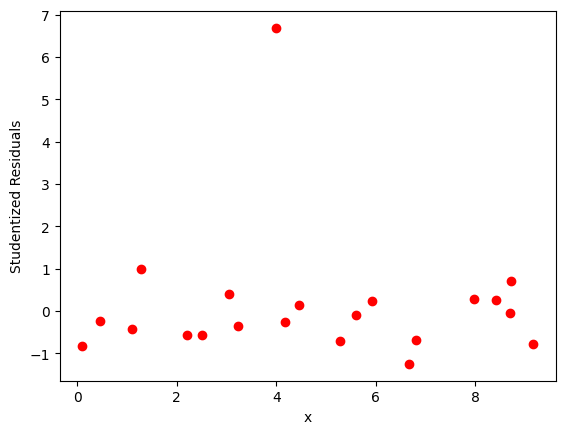

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mydataframe.iloc[:,0], student_resid,marker='o', linestyle="", color = 'red')
plt.xlabel('x')
plt.ylabel('Studentized Residuals')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                   0.01071
Date:                Fri, 01 Mar 2024   Prob (F-statistic):              0.919
Time:                        11:27:02   Log-Likelihood:                -39.131
No. Observations:                  21   AIC:                             82.26
Df Residuals:                      19   BIC:                             84.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2030      0.699      0.290      0.7

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/regressionplots.py:157: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  ax.plot(x1, results.fittedvalues[x1_argsort], 'D', color='r',


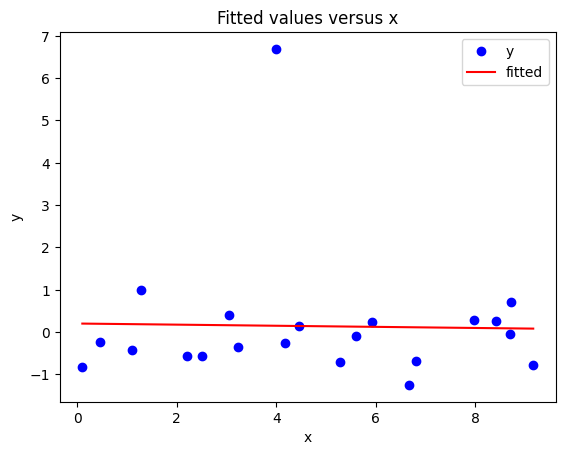

In [ ]:
import statsmodels.api as sm
x = mydataframe.iloc[:,0]
y = student_resid
x = sm.add_constant(x)

my_model = sm.OLS(y,x).fit()
print(my_model.summary())

fig,ax = plt.subplots()
fig = sm.graphics.plot_fit(my_model,1,ax=ax, vlines = False, ls = "-", marker = "None")

In [ ]:
# use freedom = n-k-2
n = len(mydataframe)
k = len(mydataframe.columns)
freedom = n-k-2

print('Degrees of freedom: \n', freedom)

Degrees of freedom: 
 15


Text(0, 0.5, 'Probability Density Function (PDF)')

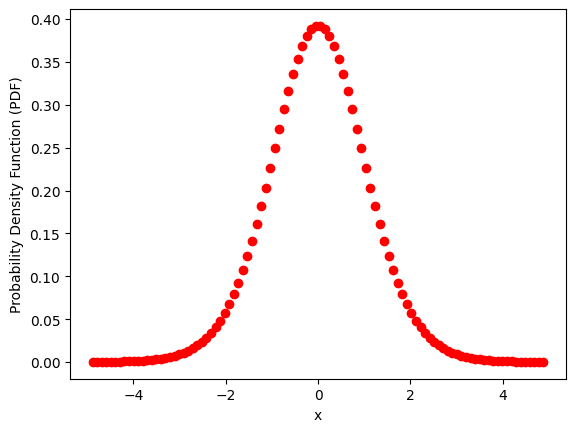

In [ ]:
#t-distribution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

rv = t(freedom, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100) # xdata for plot
y = rv.pdf(x) # ydata for plot pdf = probability density function

plt.plot(x, y, marker='o', linestyle="", color = 'red')
plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')



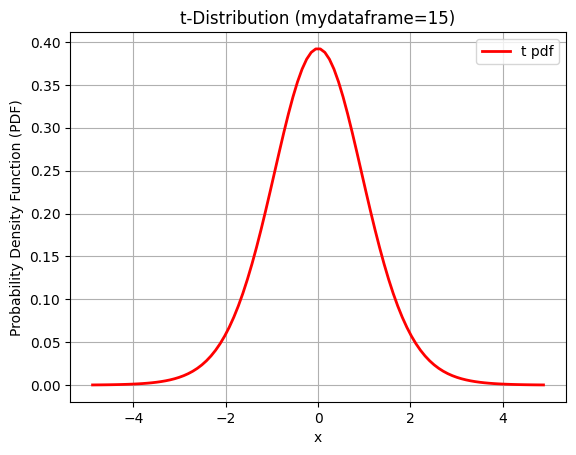

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

rv = t(freedom, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100) # xdata for plot
y = rv.pdf(x) # ydata for plot pdf = probability density function
plt.plot(x, y, 'r-', lw=2, label='t pdf')
plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.title('t-Distribution (mydataframe={})'.format(freedom))
plt.legend(loc='best')
plt.grid(True)
plt.show()

13. Plot the DFFITS against the x values Get DFFITS using (dffits, p) = influence.dffits Compare the DFFITS to:√(2&(k+2)/(n-k-2)) What can you conclude from this result?



In [ ]:
(dffits, p) = influence.dffits
dffits

array([-0.37897362, -0.1050067 , -0.16247775,  0.36736828, -0.17546596,
       -0.16376936,  0.10669839, -0.09265208,  0.03061183, -0.05849487,
       -0.16025417, -0.021828  ,  0.0598789 , -0.34035429, -0.1883448 ,
        0.10016769,  0.09770954,  0.29275742, -0.02188354, -0.33969577,
        1.55049995])

Text(0, 0.5, 'DFFITS')

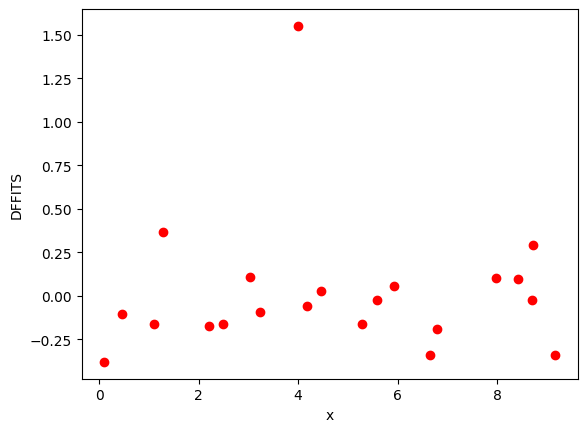

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mydataframe.iloc[:,0], dffits,marker='o', linestyle="", color = 'red')
plt.xlabel('x')
plt.ylabel('DFFITS')

In [ ]:
dffits_result = np.sqrt((k + 2) / (n - k - 2))

print('Result to compare DFFITS to: \n',dffits_result )

Result to compare DFFITS to: 
 0.6324555320336759


14. Plot the DFBETAS against the x values Get DFFITS using dfbetas = influence.dfbetas #The first column is for b0, the second for b1 Compare the DFBETAS to 2/√n . What can you conclude from this result?

In [ ]:
dfbetas = influence.dfbetas   #find out what this means taking it from influence
dfbetas

array([[-0.37831098,  0.3237714 ],
       [-0.10453408,  0.08770218],
       [-0.16009175,  0.12845918],
       [ 0.36030341, -0.28477328],
       [-0.16477402,  0.11734257],
       [-0.15009794,  0.10194411],
       [ 0.0915384 , -0.05520713],
       [-0.07689806,  0.04374085],
       [ 0.01708982, -0.00320615],
       [-0.03723237,  0.01176918],
       [-0.04750293, -0.02970386],
       [-0.00430125, -0.00622142],
       [ 0.0056987 ,  0.02287945],
       [ 0.03611788, -0.19040384],
       [ 0.02614743, -0.1104526 ],
       [-0.03564176,  0.0753313 ],
       [-0.04036738,  0.0773379 ],
       [-0.13092158,  0.23830555],
       [ 0.00975239, -0.0177912 ],
       [ 0.16682494, -0.28597814],
       [ 1.05329375, -0.39780235]])

Text(0, 0.5, 'DFBETAS')

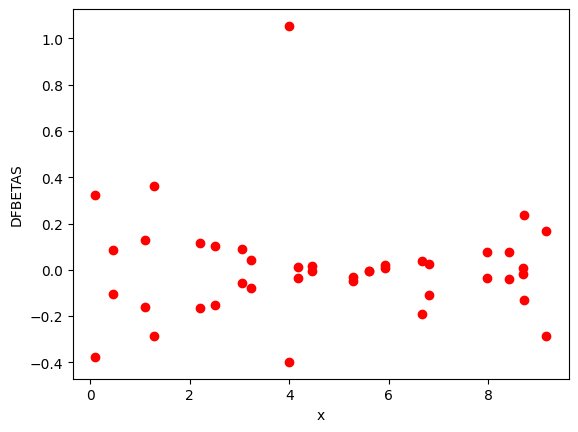

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.plot(mydataframe.iloc[:,0], dfbetas,marker='o', linestyle="", color = 'red')
plt.xlabel('x')
plt.ylabel('DFBETAS')



In [ ]:
dfbetas_result = 2/np.sqrt(n)

print('Result to compare DFBETAS to: \n',dfbetas_result )


Result to compare DFBETAS to: 
 0.4364357804719848
